In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [2]:
a = cv2.imread('COCO_train2014_000000000009.jpg')
b = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

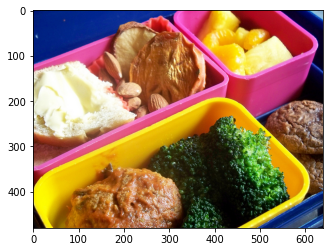

In [3]:
plt.imshow(b)

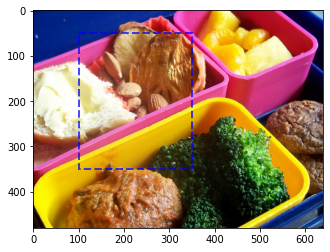

In [82]:
from matplotlib import patches
import matplotlib

# for bboxes - Test
p = patches.Rectangle((x1, y1), width, height, linewidth=2,
                                alpha=0.7, linestyle="dashed",
                                edgecolor=color, facecolor='none')
fig, ax = plt.subplots()
ax.imshow(b)
ax.add_patch(p)

In [132]:
b.shape
bbox_img = np.zeros([480,640])
bbox_img[50:350,100:350] = 1
bbox_img2 = np.ones([250,300])

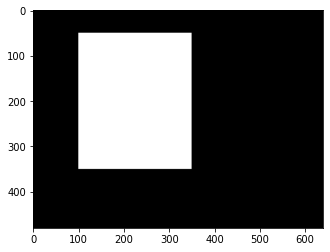

In [133]:
plt.imshow(bbox_img, 'gray')
### To transform bbox, make bbox an image to make use of cv2.affinetransform.

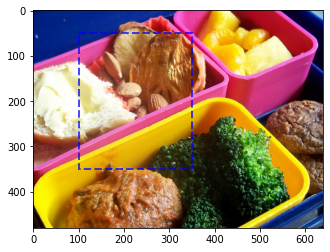

In [134]:
bbox = [50, 100, 250, 300]
y1, x1, width, height = bbox
color = 'blue'
p = patches.Rectangle((x1, y1), width, height, linewidth=2,
                                alpha=0.7, linestyle="dashed",
                                edgecolor=color, facecolor='none')
fig, ax = plt.subplots()
ax.imshow(b)
ax.add_patch(p)

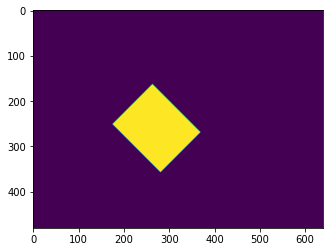

In [136]:
plt.imshow(new_bbox)

In [138]:
min_h, max_h, min_w, max_w = 999, 0, 999, 0
for i in range(480):
    for j in range(640):
        if new_bbox[i,j] == 1:
            min_h = min(min_h, i)
            max_h = max(max_h, i)
            min_w = min(min_w, j)
            max_w = max(max_w, j)
            
# Rotated rectangular을 포함하는 사각형으로.

In [140]:
bbox_transformed = [min_h, min_w, (max_w-min_w), max_h - min_h]

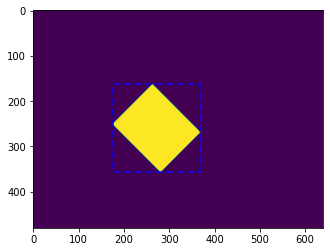

In [142]:
y1, x1, width, height = bbox_transformed
color = 'blue'
p = patches.Rectangle((x1, y1), width, height, linewidth=2,
                                alpha=0.7, linestyle="dashed",
                                edgecolor=color, facecolor='none')
fig, ax = plt.subplots()
# ax.imshow(b)
ax.imshow(new_bbox)
ax.add_patch(p)

<ipython-input-120-056cd1b21747>:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  transformed_bbox = np.array([self.bboxes[i][0], list(outer_bbox)])


[2, (0, 0, 100, 150, 2)] [2 list([0, 76, 99, 299, 2])]
[2, (200, 200, 300, 300, 2)] [2 list([200, 126, 299, 299, 2])]


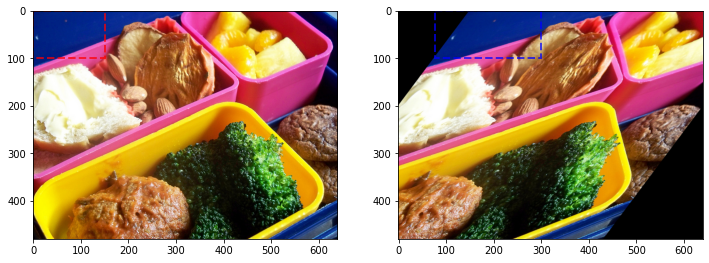

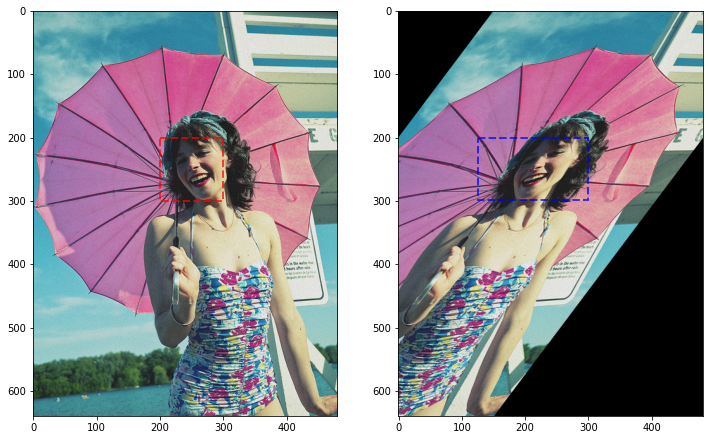

In [120]:
class affine_transform:
    def __init__(self, image, bboxes, masks):
#     bboxes: [num_instance, (y1, x1, y2, x2, class_id)] in image coordinates.
        self.image = image
        self.bboxes = bboxes
        self.masks = masks
        self.bbox_masks = np.array([])
        self.rows, self.cols = image.shape[:2]
        for i in range(bboxes[0][0]):
            bbox_mask = np.zeros(image.shape[:2])
            y1, x1, y2, x2 = bboxes[i][1][:4]
            bbox_mask[y1:y2,x1:x2] = 1
            if i == 0:
                self.bbox_masks = bbox_mask
            else:
                self.bbox_masks = np.vstack([[self.bbox_masks], [bbox_mask]])
        ### bbox_masks = 0과 1로 된 bbox 영역 이미지.
        
    def get_outer_bounding_box(self, transformed_bbox):
        min_h, max_h, min_w, max_w = self.cols, 0, self.rows, 0
        for i in range(self.rows):
            for j in range(self.cols):
                if transformed_bbox[i,j] == 1:
                    min_h = min(min_h, i)
                    max_h = max(max_h, i)
                    min_w = min(min_w, j)
                    max_w = max(max_w, j)
        return [min_h, min_w, max_h, max_w]
    
    def affine_transformation(self, M):
        new_image = cv2.warpAffine(self.image, M, (self.cols, self.rows))
        transformed_bboxes = np.array([])
        for i in range(self.bbox_masks.shape[0]):
            new_bbox = cv2.warpAffine(self.bbox_masks[i], M, (self.cols, self.rows))
            outer_bbox = self.get_outer_bounding_box(new_bbox)
            outer_bbox.append(self.bboxes[i][1][4])
            transformed_bbox = np.array([self.bboxes[i][0], list(outer_bbox)])
#             print(transformed_bbox.shape)
            # mask <- 추가해야함
            if i == 0:
                transformed_bboxes = transformed_bbox
            else:
                transformed_bboxes = np. vstack(([transformed_bboxes], transformed_bbox))
        
        print(self.bboxes[0], transformed_bboxes[0])
        return new_image, transformed_bboxes
    
    def visualization(self, M):
        img, tf_bboxes = self.affine_transformation(M)
        y1, x1, y2, x2 = tf_bboxes[0][1][:4]
        width = x2 - x1
        height = y2 - y1
        color = 'blue'
        p = patches.Rectangle((x1,y1), width, height, linewidth=2,
                                        alpha=0.7, linestyle="dashed",
                                        edgecolor=color, facecolor='none')
        # (original point)
        y1o, x1o, y2o, x2o = self.bboxes[0][1][:4]
        widtho = x2o -x1o
        heighto = y2o-y1o
        color = 'red'
        p2 = patches.Rectangle((y1o,x1o), widtho, heighto, linewidth=2,
                                        alpha=0.7, linestyle="dashed",
                                        edgecolor=color, facecolor='none')
        
        fig = plt.figure(figsize = (12,12))
        ax = fig.add_subplot(1,2,1)
        ax.imshow(self.image)
        ax.add_patch(p2)
        ax = fig.add_subplot(1,2,2)
        ax.imshow(img)
        ax.add_patch(p)

cols, rows = b.shape[:2]
A = affine_transform(b, [[2, (0,0,100,150,2)],[2,(10,15,30,50,5)]], None)
M= cv2.getRotationMatrix2D((cols/2, rows/2),45, 0.5)
# c, tf_bboxes = A.affine_transformation(M)
# A.visualization(M)
# M2 = cv2.
pts1 = np.float32([[0,0],[200,200],[300,200]])
pts2 = np.float32([[150,0],[200,200],[300,200]])
M2 = cv2.getAffineTransform(pts1, pts2)
A.visualization(M2)
d = cv2.imread('COCO_train2014_000000000036.jpg')
e = cv2.cvtColor(d, cv2.COLOR_BGR2RGB)
B = affine_transform(e, [[2, (200,200,300,300,2)],[2,(10,15,30,50,5)]], None)
B.visualization(M2)